## what this script does
It takes a shortstack result dataframe and generate a barplot with the numbers of A,C,G,U found in the sequences of the MajorRNA column

## Steps

1. Reads a shortstack result dataframe
2. extracts the majorRNA column and puts it into a list
3. extracts the first nucleotide from the first column
4. builds a dataframe that stores this information.
5. makes a barplot with one bar per letter (n=4, x-axis) and the number of times the letter was found.

**Dataframe with the information**: from a list of sequences, count the numbers of A,C,G,U in the five and three prime. Returns a small dataframe that looks like:

| pos         | A  | U | C | G |
|-------------|----|---|---|---|
| five prime  | 10 | 2 | 5 | 6 |





## Step 0 import modules and create helper functions

In [82]:
import pandas as pd
from collections import Counter
import seaborn as sns

def get_list_of_five_prime_nucleotides(list_of_srna_sequences):
    "from a list of sRNA sequences, extracts the five prime nucleotide and returns a list"
    five_prime_nucleotides = [seq[0] for seq in list_of_srna_sequences]
    return five_prime_nucleotides

def get_list_of_three_prime_nucleotides(list_of_srna_sequences):
    "from a list of sRNA sequences, extracts the three prime nucleotide and returns a list"
    three_prime_nucleotides = [seq[-1] for seq in list_of_srna_sequences]
    return three_prime_nucleotides


def count_nucleotides(list_of_srna_sequences):
    "takes a list of small RNA sequences and returns the counts of each nucleotide in a dictionary"
    cnt = Counter(list_of_srna_sequences)
    d = {}
    for key,value in cnt.items():
        d[key]=value
    return d


def create_barplot_from_end_nucleotide_counts(shortstack_result_dataframe,end=["five","three"]):
    "reads a ShortStack result dataframe and counts the number of A/C/G/U of the Major RNA 5' nucleotides"
    df = pd.read_csv(shortstack_result_dataframe,sep="\t")
    majorRNAs = df['MajorRNA'].tolist()
    if end == "five":
        end_nucleotides = get_list_of_five_prime_nucleotides(majorRNAs)
    elif end == "three":
        end_nucleotides = get_list_of_three_prime_nucleotides(majorRNAs)
    else:
        print("the end argument should be equal to either 'five' or 'three'")
    # counts occurences of nucleotides
    cnt_dict = count_nucleotides(end_nucleotides)
    # converts the dictoinary into a dataframe
    counts = pd.DataFrame.from_dict(cnt_dict,orient="index")
    counts = counts.reset_index()
    if end == "five":
        counts.columns=["nucleotide","five_prime_counts"]
        fig = sns.barplot(data=counts,x="nucleotide",y="five_prime_counts")
    elif end == "three":
        counts.columns=["nucleotide","three_prime_counts"]
        fig = sns.barplot(data=counts,x="nucleotide",y="three_prime_counts")
    return fig


## Make the barplot of 5' nucleotide occurences 

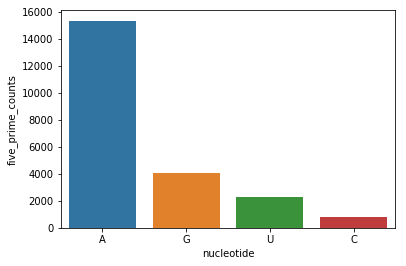

In [83]:
create_barplot_from_end_nucleotide_counts("../test/Results.txt",end="five")

## Make the barplot of 3' nucleotide occurences

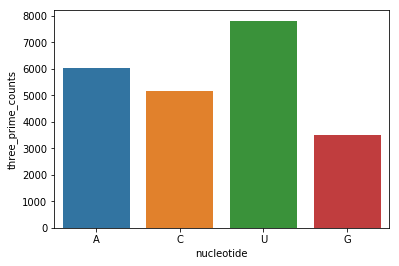

In [85]:
create_barplot_from_end_nucleotide_counts("../test/Results.txt",end="three")